In [1]:
from os.path import join, dirname, exists
from os import makedirs
from itertools import chain, islice

from thesis_v2 import dir_dict
from thesis_v2.plots.main_results_tables import preprocess

In [2]:
from scipy.stats import sem
import numpy as np

In [3]:
import pandas as pd

In [4]:
f_main_result = join(dir_dict['analyses'], 'yuanyuan_8k_a_3day_refactored', '20200725+20200801+20200801_2', 'source_analysis.pkl')
df_main_result = pd.read_pickle(f_main_result)

f_main_result_2 = join(dir_dict['analyses'], 'yuanyuan_8k_a_3day_refactored', '20201001+20201012', 'source_analysis.pkl')
df_main_result_2 = pd.read_pickle(f_main_result_2)
df_main_result = pd.concat([df_main_result, df_main_result_2], axis=0).sort_index()
assert df_main_result.index.unique
del df_main_result_2

In [5]:
f_main_result_perf = join(dir_dict['analyses'], 'yuanyuan_8k_a_3day_refactored', '20200725+20200801+20200801_2', 'main_result.pkl')
df_main_result_perf = pd.read_pickle(f_main_result_perf)
f_main_result_2 = join(dir_dict['analyses'], 'yuanyuan_8k_a_3day_refactored', '20201001', 'main_result.pkl')
f_main_result_3 = join(dir_dict['analyses'], 'yuanyuan_8k_a_3day_refactored', '20201012', 'main_result.pkl')
df_main_result_perf = pd.concat([
    df_main_result_perf,
    pd.read_pickle(f_main_result_2),
    pd.read_pickle(f_main_result_3),
], axis=0).sort_index()
assert df_main_result_perf.index.unique

In [6]:
df_main_result

num_param  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep              
relu     False                mse       0          2         8           1           cm-avg       1280            17461   
                                                                                                  2560            17461   
                                                                                                  5120            17461   
                                                                                     cm-last      1280            17461   
                                                                                                  2560            17461   
...                                                                                                                 ...   
softplus True                 poisson   1          6         48          1           legacy       2560           127501   
                                                                                                  5120           127501   
                                                             64          1           legacy       1280           210893   
                                                                                                  2560           210893   
                                                                                                  5120           210893   

                                                                                                                                                source_analysis  
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                                                     
relu     False                mse       0          2         8           1           cm-avg       1280                        {('I', 'B1'): 0.7241598808209915}  
                                                                                                  2560                         {('I', 'B1'): 2.134264596867908}  
                                                                                                  5120                         {('I', 'B1'): 2.870888935845869}  
                                                                                     cm-last      1280                        {('I', 'B1'): 0.7241598808209915}  
                                                                                                  2560                         {('I', 'B1'): 2.134264596867908}  
...                                                                                                                                                         ...  
softplus True                 poisson   1          6         48          1           legacy       2560        {('I', 'B1', 'B2', 'B3', 'B4', 'B5'): 0.254067...  
                                                                                                  5120        {('I', 'B1', 'B2', 'B3', 'B4', 'B5'): 0.987691...  
                                                             64          1           legacy       1280        {('I', 'B1', 'B2', 'B3', 'B4', 'B5'): 0.126919...  
                                                                                                  2560        {('I', 'B1', 'B2', 'B3', 'B4', 'B5'): 0.473848...  
                                                                                                  5120        {('I', 'B1', 'B2', 'B3', 'B4', 'B5'): 2.301965...  

[15312 rows x 2 columns]

In [7]:
df_main_result_perf

cc2_normed_avg  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                   
relu     False                mse       0          2         8           1           cm-avg       1280              0.357125   
                                                                                                  2560              0.524376   
                                                                                                  5120              0.568387   
                                                                                     cm-last      1280              0.357125   
                                                                                                  2560              0.524376   
...                                                                                                                      ...   
softplus True                 poisson   1          6         48          1           legacy       2560              0.629205   
                                                                                                  5120              0.681167   
                                                             64          1           legacy       1280              0.561157   
                                                                                                  2560              0.632569   
                                                                                                  5120              0.682993   

                                                                                                              cc2_raw_avg  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                
relu     False                mse       0          2         8           1           cm-avg       1280           0.170239   
                                                                                                  2560           0.245452   
                                                                                                  5120           0.263209   
                                                                                     cm-last      1280           0.170239   
                                                                                                  2560           0.245452   
...                                                                                                                   ...   
softplus True                 poisson   1          6         48          1           legacy       2560           0.289585   
                                                                                                  5120           0.313140   
                                                             64          1           legacy       1280           0.259474   
                                                                                                  2560           0.291328   
                                                                                                  5120           0.313777   

                                                                                                              cc_raw_avg  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep               
relu     False                mse       0          2         8           1           cm-avg       1280          0.379368   
                                                                                                  2560          0.471792   
                                                                                                  5120          0.493379   
                                                                                     cm-last      1280          0.379368   
                                                                           

In [8]:
assert df_main_result.index.equals(df_main_result_perf.index)

In [9]:
def remove_high_cls(df_this):
    df_this = df_this[df_this.index.get_level_values('rcnn_bl_cls') <= 7]
    return df_this.sort_index()

df_main_result = remove_high_cls(df_main_result)
df_main_result_perf = remove_high_cls(df_main_result_perf)

assert df_main_result.index.equals(df_main_result_perf.index)

In [10]:
def get_normalized_vec(x):
#     keys = [('I',) + ('B1',) + ('R1',)*i for i in range(7)]
#     assert x.keys() <= set(keys)
    ret = np.zeros((8,))
    for key, v in x.items():
        assert len(key) >= 2 and len(key) <= 9
        ret[len(key)-2] += v  # -2 because minimal length of key is 2 (I + one Conv)
    ret = ret/ret.sum()
    return ret

df_main_result['source_analysis_vec'] = df_main_result['source_analysis'].map(lambda x: get_normalized_vec(x))
del df_main_result['source_analysis']

In [11]:
# show mean vs sem, for different cls

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

In [13]:
from scipy.spatial import distance

In [14]:
# check difference of source analysis vec among different nuisance parameters.
# Ideally I'd like to remove ALL nuisance parameters by averaging them out.

def check_nuisance_parameters(df_this):
    for param_name in ['act_fn', 'loss_type', 'ff_1st_bn_before_act', 'model_seed']:
        unique_vals = df_this.index.get_level_values(param_name).unique().tolist()
        assert len(unique_vals) == 2
        dd1 = df_this.xs(unique_vals[0], level=param_name)
        dd2 = df_this.xs(unique_vals[1], level=param_name)
        plt.close('all')
        fig, ax = plt.subplots(squeeze=True)
        print(param_name)
        assert dd1.index.equals(dd2.index)
        cosine_sim = [distance.cosine(x, y) for x, y in zip(
            dd1['source_analysis_vec'].values,
            dd2['source_analysis_vec'].values
        )]
        ax.hist(cosine_sim, bins=20)
        plt.show()

act_fn


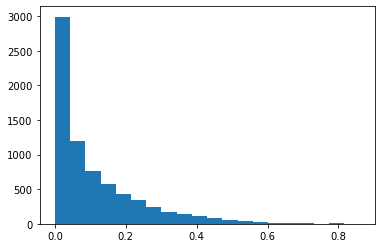

loss_type


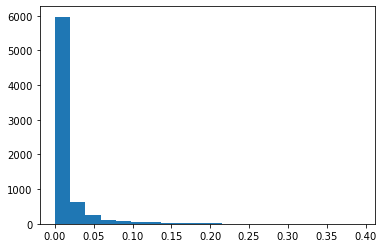

ff_1st_bn_before_act


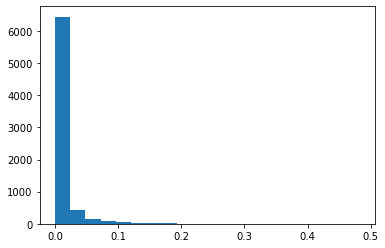

model_seed


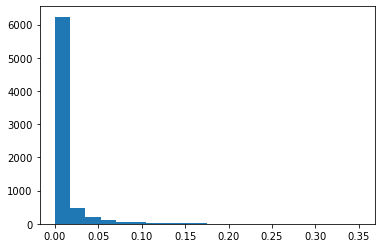

In [15]:
check_nuisance_parameters(df_main_result)
# act fn matters. other ones almost do not matter.
# let's reduce them out!!!

In [18]:
def get_reduced_data(df_this):
    axes_to_reduce = ['loss_type', 'ff_1st_bn_before_act', 'model_seed']
    columns, df_ff, df_r = preprocess(df_this, axes_to_reduce=axes_to_reduce, max_cls=None)
    return {
        'df_ff': df_ff,
        'df_r': df_r,
        'columns': columns,
    }

In [19]:
df_main_result_reduced_dict = get_reduced_data(df_main_result)
df_main_result_perf_reduced_dict = get_reduced_data(df_main_result_perf)

In [21]:
df_main_result_reduced_dict['df_ff']

num_param_mean  \
act_fn   num_layer out_channel train_keep                   
relu     2         8           1280               17457.0   
                               2560               17457.0   
                               5120               17457.0   
                   16          1280               20501.0   
                               2560               20501.0   
...                                                   ...   
softplus 6         48          2560              127525.0   
                               5120              127525.0   
                   64          1280              210925.0   
                               2560              210925.0   
                               5120              210925.0   

                                                           source_analysis_vec_mean  \
act_fn   num_layer out_channel train_keep                                             
relu     2         8           1280        [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   
                               2560        [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   
                               5120        [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   
                   16          1280        [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   
                               2560        [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   
...                                                                             ...   
softplus 6         48          2560        [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]   
                               5120        [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]   
                   64          1280        [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]   
                               2560        [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]   
                               5120        [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]   

                                           num_param_sem  \
act_fn   num_layer out_channel train_keep                  
relu     2         8           1280             1.414214   
                               2560             1.414214   
                               5120             1.414214   
                   16          1280             2.828427   
                               2560             2.828427   
...                                                  ...   
softplus 6         48          2560             8.485281   
                               5120             8.485281   
                   64          1280            11.313708   
                               2560            11.313708   
                               5120            11.313708   

                                                            source_analysis_vec_sem  
act_fn   num_layer out_channel train_keep                                            
relu     2         8           1280        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]  
                               2560        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]  
                               5120        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]  
                   16          1280        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]  
                               2560        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]  
...                                                                             ...  
softplus 6         48          2560        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]  
                               5120        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]  
                   64          1280        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]  
                               2560        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]  
                               5120        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]  

[186 rows x 4 columns]

In [25]:
df_main_result_reduced_dict['df_r']

num_param_mean  \
act_fn   out_channel rcnn_bl_cls readout_type train_keep num_layer                   
relu     8           2           cm-avg       1280       3                 18049.0   
                                                         5                 19233.0   
                                              2560       3                 18049.0   
                                                         5                 19233.0   
                                              5120       3                 18049.0   
...                                                                            ...   
softplus 64          7           inst-last    1280       5                175213.0   
                                              2560       3                100589.0   
                                                         5                175213.0   
                                              5120       3                100589.0   
                                                         5                175213.0   

                                                                                             source_analysis_vec_mean  \
act_fn   out_channel rcnn_bl_cls readout_type train_keep num_layer                                                      
relu     8           2           cm-avg       1280       3          [0.8141460011030491, 0.18585399889695084, 0.0,...   
                                                         5          [0.0, 0.8425977938008885, 0.15740220619911152,...   
                                              2560       3          [0.7059966413500562, 0.29400335864994365, 0.0,...   
                                                         5          [0.0, 0.771096896759464, 0.22890310324053606, ...   
                                              5120       3          [0.6701848246390725, 0.3298151753609276, 0.0, ...   
...                                                                                                               ...   
softplus 64          7           inst-last    1280       5          [0.0, 0.17783260564549233, 0.2124943782980831,...   
                                              2560       3          [0.15969231129550943, 0.15632896219561324, 0.1...   
                                                         5          [0.0, 0.09265339159102406, 0.1424472677646416,...   
                                              5120       3          [0.10456257732247558, 0.11598980664508501, 0.1...   
                                                         5          [0.0, 0.0495669386344082, 0.09254659578748389,...   

                                                                    num_param_sem  \
act_fn   out_channel rcnn_bl_cls readout_type train_keep num_layer                  
relu     8           2           cm-avg       1280       3               1.414214   
                                                         5               1.414214   
                                              2560       3               1.414214   
                                                         5               1.414214   
                                              5120       3               1.414214   
...                                                                           ...   
softplus 64          7           inst-last    1280       5              11.313708   
                                              2560       3              11.313708   
                                                         5              11.313708   
                                              5120       3              11.313708   
                                                         5              11.313708   

                                                                                              source_analysis_vec_sem  
act_fn   out_channel rcnn_bl_cls readout_type train_keep num_layer                                                     
relu     8           2       

In [34]:
from sklearn.decomposition import PCA

In [39]:
# let's try some PCA on the vectors.
def try_pca(df_this):
    for train_keep in df_this.index.get_level_values('train_keep').unique():
        for num_layer in df_this.index.get_level_values('num_layer').unique():
            key = (train_keep, num_layer)
            print(key)
            df_this_slice = df_this.xs(key=key, level=('train_keep', 'num_layer'))
            data_this = np.array([x for x in df_this_slice['source_analysis_vec_mean'].values])
            assert data_this.ndim == 2
            assert data_this.shape[1] == 8
            pca = PCA(random_state=0)
            pca.fit(data_this)
            print(np.cumsum(pca.explained_variance_ratio_))

In [40]:
try_pca(df_main_result_reduced_dict['df_r'])
# 4 dim is enough. ideally I want 1.

(1280, 3)
[0.76973734 0.896964   0.96536018 0.98904796 0.99726075 1.
 1.         1.        ]
(1280, 5)
[0.79881376 0.92008183 0.97819022 0.99426339 0.99883663 1.
 1.         1.        ]
(2560, 3)
[0.65335461 0.81558604 0.90567002 0.96345062 0.98895745 1.
 1.         1.        ]
(2560, 5)
[0.7264818  0.86703359 0.94752818 0.98380484 0.9961696  1.
 1.         1.        ]
(5120, 3)
[0.56240541 0.76036938 0.85513391 0.92407846 0.97342307 1.
 1.         1.        ]
(5120, 5)
[0.65013722 0.83248001 0.90067784 0.96055847 0.98862987 1.
 1.         1.        ]


In [42]:
df_main_result_reduced_dict['df_ff']

num_param_mean  \
act_fn   num_layer out_channel train_keep                   
relu     2         8           1280               17457.0   
                               2560               17457.0   
                               5120               17457.0   
                   16          1280               20501.0   
                               2560               20501.0   
...                                                   ...   
softplus 6         48          2560              127525.0   
                               5120              127525.0   
                   64          1280              210925.0   
                               2560              210925.0   
                               5120              210925.0   

                                                           source_analysis_vec_mean  \
act_fn   num_layer out_channel train_keep                                             
relu     2         8           1280        [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   
                               2560        [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   
                               5120        [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   
                   16          1280        [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   
                               2560        [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   
...                                                                             ...   
softplus 6         48          2560        [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]   
                               5120        [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]   
                   64          1280        [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]   
                               2560        [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]   
                               5120        [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]   

                                           num_param_sem  \
act_fn   num_layer out_channel train_keep                  
relu     2         8           1280             1.414214   
                               2560             1.414214   
                               5120             1.414214   
                   16          1280             2.828427   
                               2560             2.828427   
...                                                  ...   
softplus 6         48          2560             8.485281   
                               5120             8.485281   
                   64          1280            11.313708   
                               2560            11.313708   
                               5120            11.313708   

                                                            source_analysis_vec_sem  
act_fn   num_layer out_channel train_keep                                            
relu     2         8           1280        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]  
                               2560        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]  
                               5120        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]  
                   16          1280        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]  
                               2560        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]  
...                                                                             ...  
softplus 6         48          2560        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]  
                               5120        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]  
                   64          1280        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]  
                               2560        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]  
                               5120        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]  

[186 rows x 4 columns]

In [44]:
df_main_result_reduced_dict['df_r']

num_param_mean  \
act_fn   out_channel rcnn_bl_cls readout_type train_keep num_layer                   
relu     8           2           cm-avg       1280       3                 18049.0   
                                                         5                 19233.0   
                                              2560       3                 18049.0   
                                                         5                 19233.0   
                                              5120       3                 18049.0   
...                                                                            ...   
softplus 64          7           inst-last    1280       5                175213.0   
                                              2560       3                100589.0   
                                                         5                175213.0   
                                              5120       3                100589.0   
                                                         5                175213.0   

                                                                                             source_analysis_vec_mean  \
act_fn   out_channel rcnn_bl_cls readout_type train_keep num_layer                                                      
relu     8           2           cm-avg       1280       3          [0.8141460011030491, 0.18585399889695084, 0.0,...   
                                                         5          [0.0, 0.8425977938008885, 0.15740220619911152,...   
                                              2560       3          [0.7059966413500562, 0.29400335864994365, 0.0,...   
                                                         5          [0.0, 0.771096896759464, 0.22890310324053606, ...   
                                              5120       3          [0.6701848246390725, 0.3298151753609276, 0.0, ...   
...                                                                                                               ...   
softplus 64          7           inst-last    1280       5          [0.0, 0.17783260564549233, 0.2124943782980831,...   
                                              2560       3          [0.15969231129550943, 0.15632896219561324, 0.1...   
                                                         5          [0.0, 0.09265339159102406, 0.1424472677646416,...   
                                              5120       3          [0.10456257732247558, 0.11598980664508501, 0.1...   
                                                         5          [0.0, 0.0495669386344082, 0.09254659578748389,...   

                                                                    num_param_sem  \
act_fn   out_channel rcnn_bl_cls readout_type train_keep num_layer                  
relu     8           2           cm-avg       1280       3               1.414214   
                                                         5               1.414214   
                                              2560       3               1.414214   
                                                         5               1.414214   
                                              5120       3               1.414214   
...                                                                           ...   
softplus 64          7           inst-last    1280       5              11.313708   
                                              2560       3              11.313708   
                                                         5              11.313708   
                                              5120       3              11.313708   
                                                         5              11.313708   

                                                                                              source_analysis_vec_sem  
act_fn   out_channel rcnn_bl_cls readout_type train_keep num_layer                                                     
relu     8           2       

In [48]:
def merge_reduced_dict(dict_vec, dict_perf):
    # merge df_r
    assert dict_vec['df_r'].index.equals(dict_perf['df_r'].index)
    df_r = pd.concat([
        dict_vec['df_r'][['source_analysis_vec_mean']],
        dict_perf['df_r'][['cc2_normed_avg_mean']]
    ], axis=1)
    
    # merge df_ff
    
    assert dict_vec['df_ff'].index.equals(dict_perf['df_ff'].index)
    df_ff = pd.concat([
        dict_vec['df_ff'][['source_analysis_vec_mean']],
        dict_perf['df_ff'][['cc2_normed_avg_mean']]
    ], axis=1)
    
    # return 
    return {
        'df_r': df_r,
        'df_ff': df_ff,
    }

In [49]:
merged_reduced_dict = merge_reduced_dict(
    df_main_result_reduced_dict,
    df_main_result_perf_reduced_dict
)



In [61]:
def plot_vec_bars(ax, df_this):
    data = np.asarray([x for x in df_this['source_analysis_vec_mean'].values])
    num_case, num_col = data.shape
    assert num_col == 8
    
    perf = df_this['cc2_normed_avg_mean']
    print(perf.mean(), perf.std())
    
    plt_vec_bars_inner(ax, data)

In [62]:
def plt_vec_bars_inner(ax, data, perf=None):
    data_mean = data.mean(axis=0)
    data_std = data.std(axis=0)
    
    
    ax.bar(x=np.arange(1,9), height=data_mean, yerr=data_std)
    ax.set_xlabel('# of convs inside recurrent blocks')
    ax.set_ylabel('normalized weight')
    if perf is not None:
        assert perf.shape == (data.shape[0],)
        ax.set_title('num case {}, perf {:.4f}+/-{:.4f}'.format(
        data.shape[0], perf.mean(), perf.std()))
    ax.set_ylim(0, 1.0)

In [63]:
from sklearn.cluster import KMeans

In [74]:
def get_clustering(df_this):
    num_cluster = 3
    print(df_this.shape)
    perf_vec = df_this['cc2_normed_avg_mean'].values
    src_analysis_vec = np.asarray([x.tolist() for x in df_this['source_analysis_vec_mean'].values])
    assert src_analysis_vec.ndim == 2
    assert src_analysis_vec.shape[1] == 8
    
    # do clustering.
    # for each cluster, show cluster size, vec_bars, and spread of performance.
    # 1 dimensional
    y = KMeans(n_clusters=num_cluster, random_state=0).fit_predict(perf_vec[:,np.newaxis])
    

    ret = {
        'y': y,
        'perf_vec': perf_vec,
        'src_analysis_vec': src_analysis_vec,
        'num_cluster': num_cluster,
    }
    
    return ret

In [75]:
def plot_clustering(*, y, perf_vec, src_analysis_vec, num_cluster, title=None):
    plt.close('all')
    fig, axes = plt.subplots(nrows=1, ncols=num_cluster, figsize=(20, 3))
    if title is not None:
        fig.suptitle(title)
    axes = axes.ravel()
    
    perf_mean_vec = []
    for idx in range(num_cluster):
        perf_mean_vec.append(perf_vec[y==idx].mean())
    idx_good = np.argsort(perf_mean_vec)[::-1]
    
    for idx, ax in zip(idx_good, axes):
        y_this = y==idx
        plt_vec_bars_inner(ax, src_analysis_vec[y_this], perf_vec[y_this])
    plt.show()

In [76]:
def show_scatter_plots(reduced_dict):
    df_ff, df_r = reduced_dict['df_ff'], reduced_dict['df_r']
    clustering_result_dict = []
    assert np.array_equal(
        df_r.index.get_level_values('train_keep').unique(),
        df_ff.index.get_level_values('train_keep').unique()
    )
    for train_keep in df_r.index.get_level_values('train_keep').unique():
        df_r_this_this_train_size = df_r.xs(train_keep, level='train_keep')
        df_ff_this_per_train_size = df_ff.xs(train_keep, level='train_keep')
        for readout_type in df_r_this_this_train_size.index.get_level_values('readout_type').unique():
            df_r_this_readout = df_r_this_this_train_size.xs(readout_type, level='readout_type')
            index_out_channel = df_r_this_readout.index.get_level_values('out_channel').values
            index_num_layer = df_r_this_readout.index.get_level_values('num_layer').values
            
            data_channel_layer = np.asarray([index_out_channel, index_num_layer]).T
            unique_channel_layer = np.unique(data_channel_layer, axis=0).tolist()
            
            for key_this in unique_channel_layer:                
                key_this = tuple(key_this)
                (c_this, l_this) = key_this
                global_key = {
                    'train_keep': train_keep,
                    'readout_type': readout_type,
                    'num_channel': c_this,
                    'num_layer': l_this,
                }
                
                
                df_this = df_r_this_readout.xs(key=(c_this, l_this), level=('out_channel', 'num_layer'))
                df_ff_this = df_ff_this_per_train_size.xs(key=(c_this, l_this), level=('out_channel', 'num_layer')).copy()
                df_ff_this['rcnn_bl_cls'] = 1
                df_ff_this = df_ff_this.set_index('rcnn_bl_cls', append=True)
                
                assert df_ff_this.shape[0]*6 == df_this.shape[0]
                
                # reorder index to make sure it's ok to concat them
                assert set(df_ff_this.index.names) == set(df_this.index.names)
                df_ff_this = df_ff_this.reorder_levels(
                    order=sorted(df_ff_this.index.names),
                    axis=0
                ).sort_index()
                
                df_this = df_this.reorder_levels(
                    order=sorted(df_this.index.names),
                    axis=0
                ).sort_index()
                
                global_key.update(
                    {
                        'clustering': get_clustering(
                            pd.concat([df_this, df_ff_this], axis=0))
                    }
                )
        
                clustering_result_dict.append(global_key) 

                # let's do clustering over these types

#             print('mean of mean over this readout', df_this_readout['hal_tuning_mean'].mean(), 'mean of sem over this readout', df_this_readout['hal_tuning_sem'].mean())
#             print('mean of mean over this readout, inverted', df_this_readout['hal_tuning_mean_inv'].mean(), 'mean of sem over this readout', df_this_readout['hal_tuning_sem_inv'].mean())
    return pd.DataFrame(clustering_result_dict, columns=list(clustering_result_dict[0].keys())).set_index(
        ['train_keep','readout_type','num_channel','num_layer'], verify_integrity=True
    )
# clustering_result_dict_global = show_scatter_plots()

In [77]:
clustering_result_dict_global = show_scatter_plots(merged_reduced_dict)

(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)
(14, 2)


In [78]:
def plot_cluster_wrapper(
    clustering_result_dict_this,
    *,
    train_size=None,
    readout_type=None,
    num_c=None,
    num_l=None,
):
    key = (train_size, readout_type, num_c, num_l)
   
    levels = ('train_keep', 'readout_type', 'num_channel', 'num_layer')
    
    # remove None
    keep = [k is not None for k in key]
    key = tuple([k for k in key if k is not None])
    levels = tuple([l for keep_this, l in zip(keep, levels) if keep_this])
    assert len(key) == len(levels)
    
    data_new = clustering_result_dict_this.xs(key=key, level=levels)
    for idx, data in data_new['clustering'].iteritems():
        plot_clustering(**data, title=str(idx))

In [ ]:
# plot some slices

# increase train size

# plot_cluster_wrapper(readout_type='cm-avg',num_c=16,num_l=2)

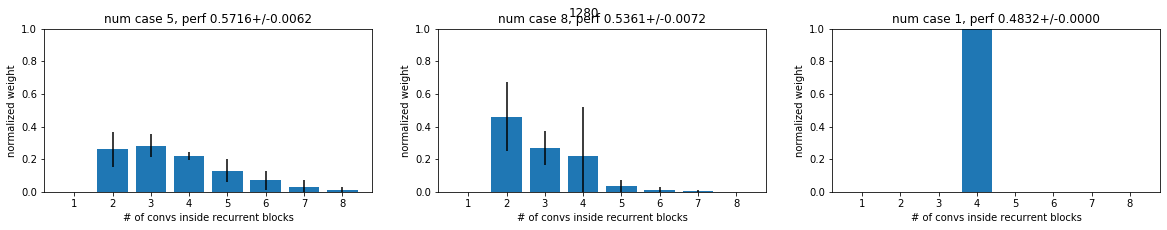

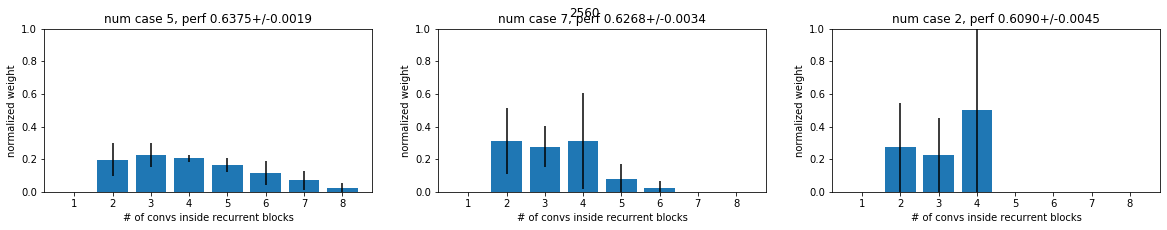

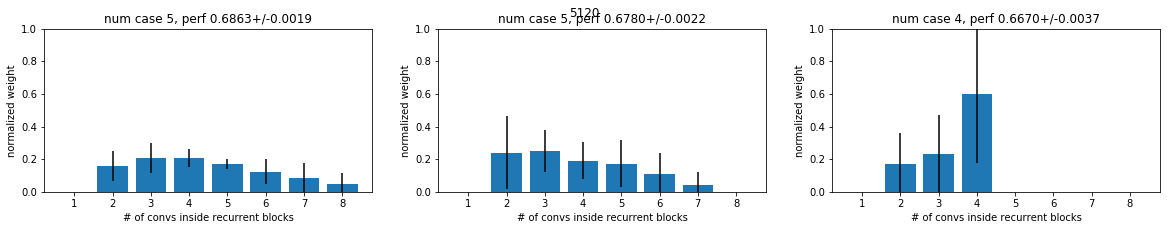

In [79]:
plot_cluster_wrapper(
    clustering_result_dict_global,
    readout_type='cm-avg',
    num_c=64,
    num_l=5,
)

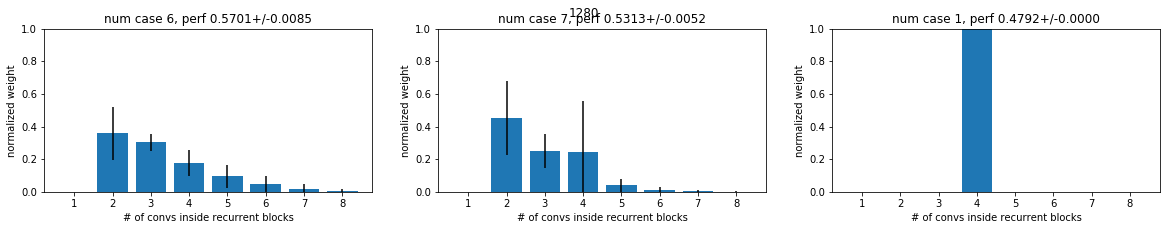

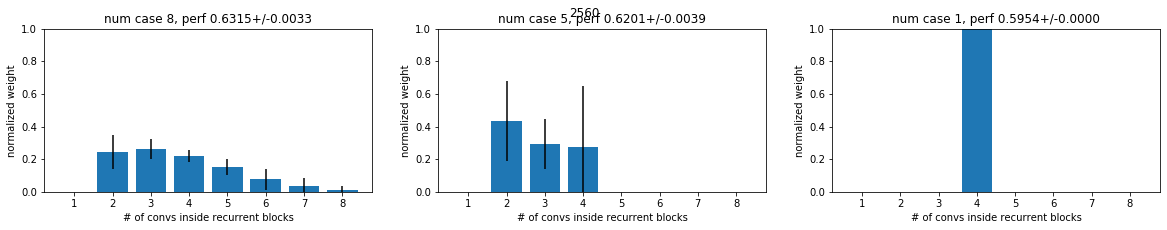

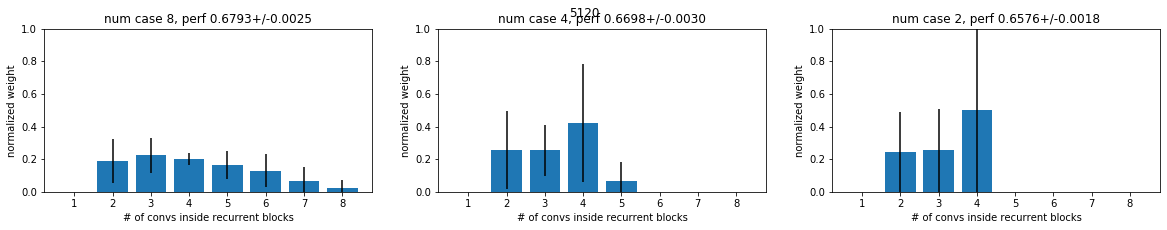

In [80]:
plot_cluster_wrapper(
    clustering_result_dict_global,
    readout_type='cm-avg',
    num_c=48,
    num_l=5,
)

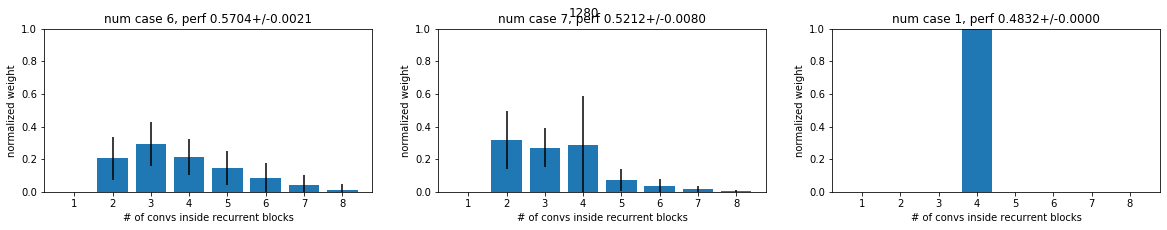

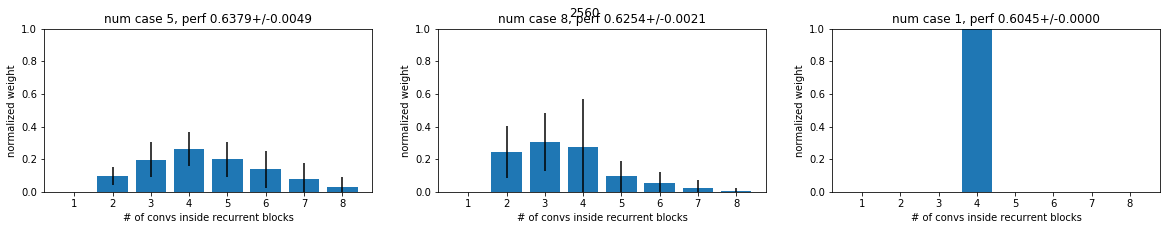

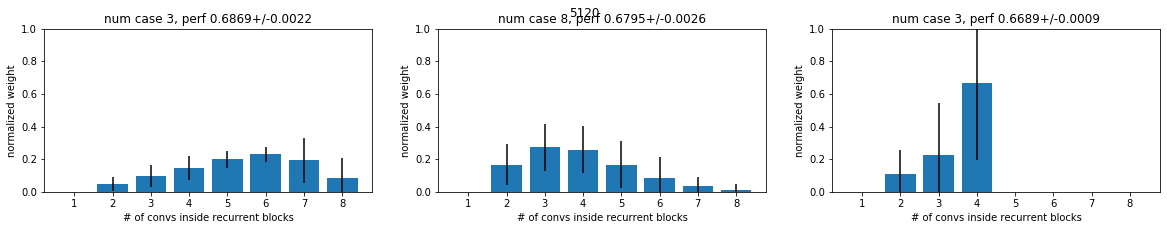

In [82]:
plot_cluster_wrapper(
    clustering_result_dict_global,
    readout_type='cm-last',
    num_c=64,
    num_l=5,
)

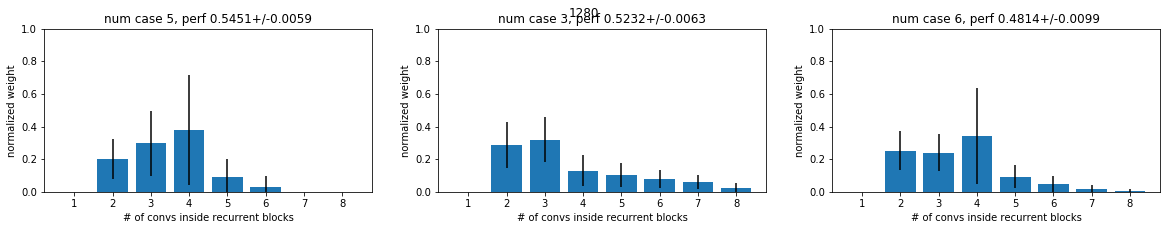

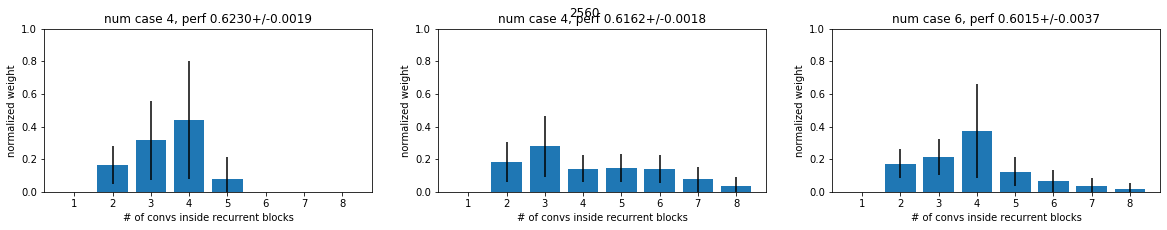

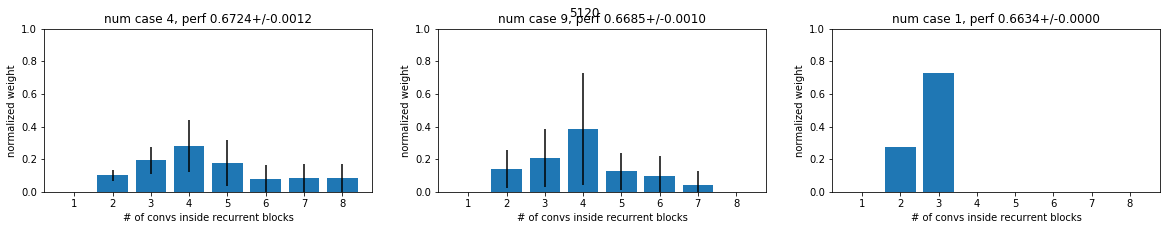

In [83]:
plot_cluster_wrapper(
    clustering_result_dict_global,
    readout_type='inst-last',
    num_c=64,
    num_l=5,
)

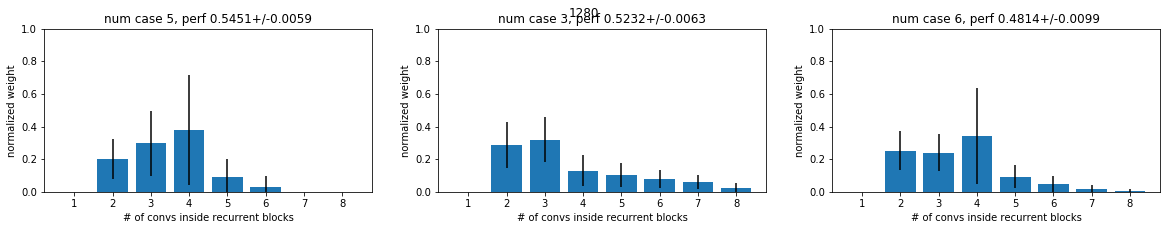

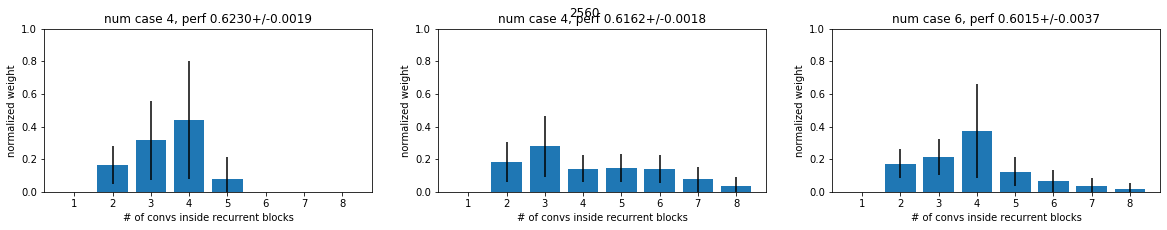

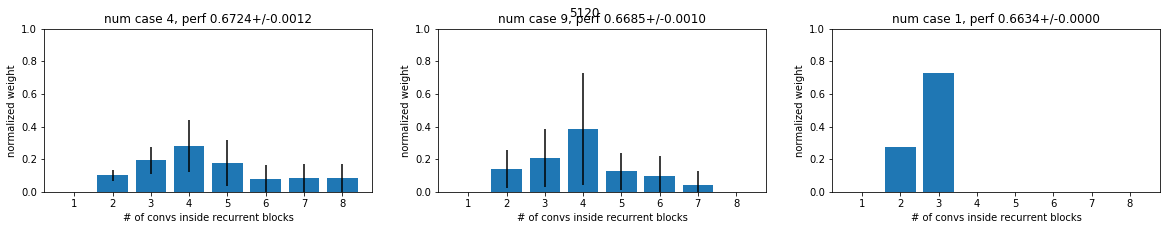

In [84]:
plot_cluster_wrapper(
    clustering_result_dict_global,
    readout_type='inst-last',
    num_c=64,
    num_l=5,
)

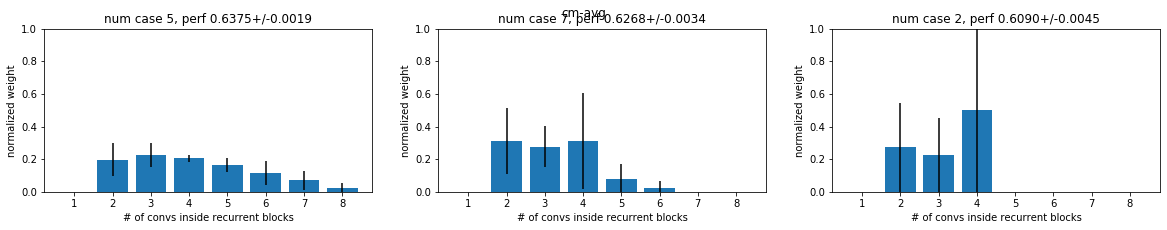

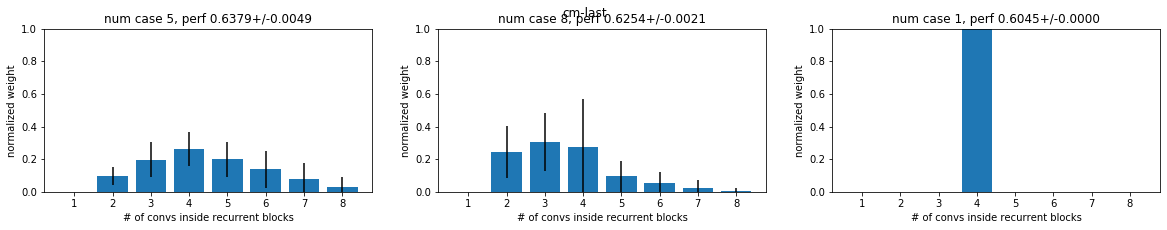

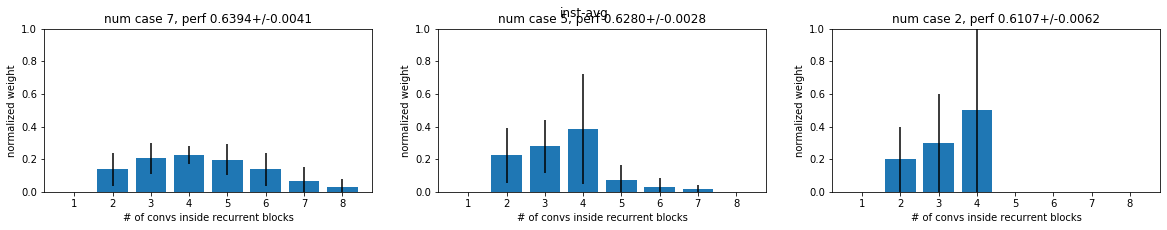

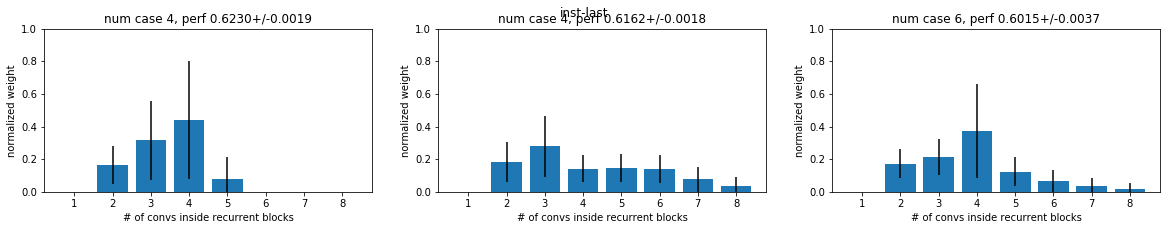

In [86]:
plot_cluster_wrapper(
    clustering_result_dict_global,
    train_size=2560,
    num_c=64,
    num_l=5,
)

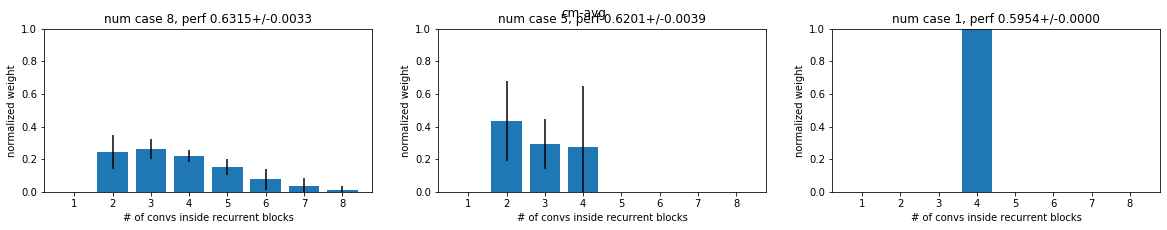

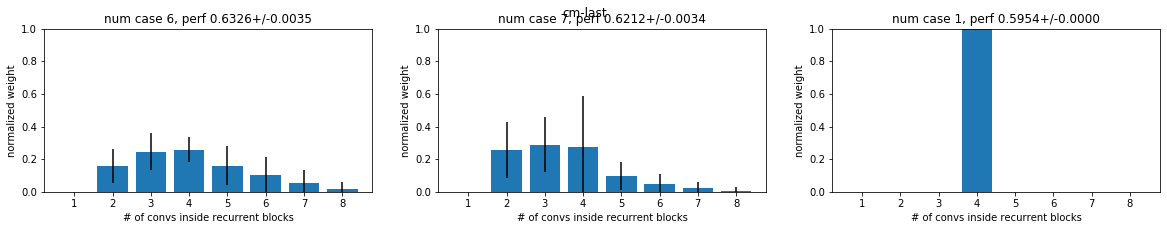

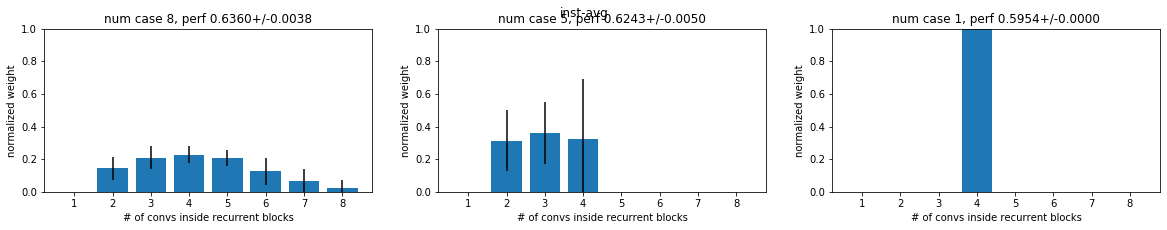

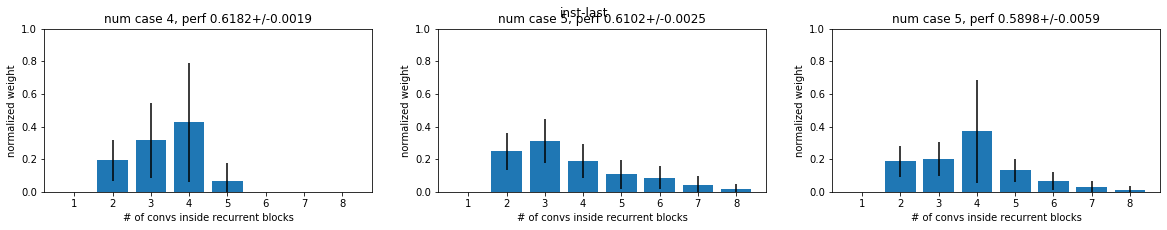

In [87]:
plot_cluster_wrapper(
    clustering_result_dict_global,
    train_size=2560,
    num_c=48,
    num_l=5,
)

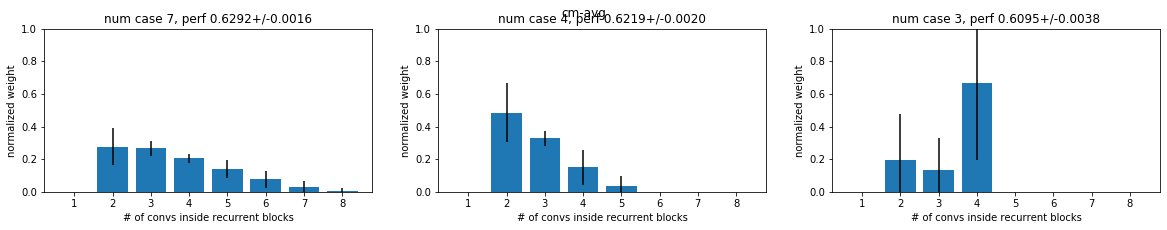

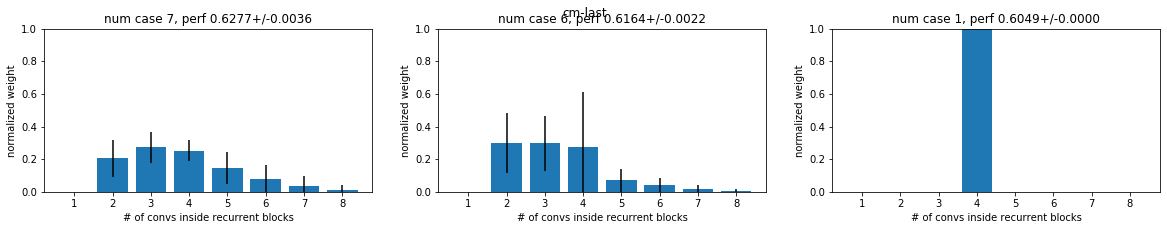

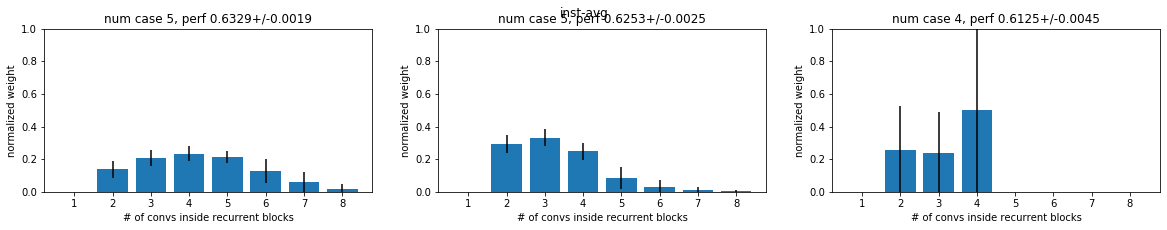

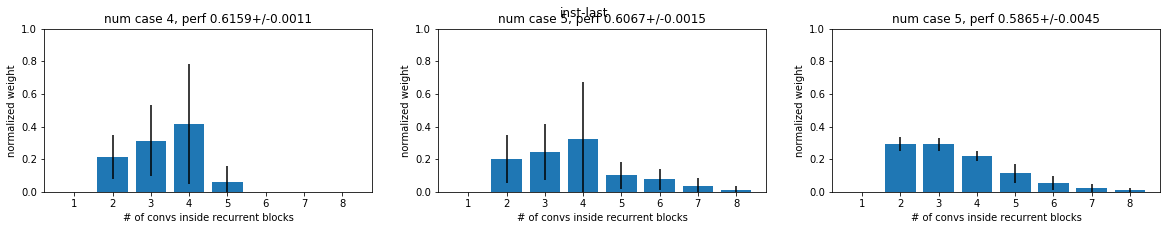

In [88]:
plot_cluster_wrapper(
    clustering_result_dict_global,
    train_size=2560,
    num_c=32,
    num_l=5,
)

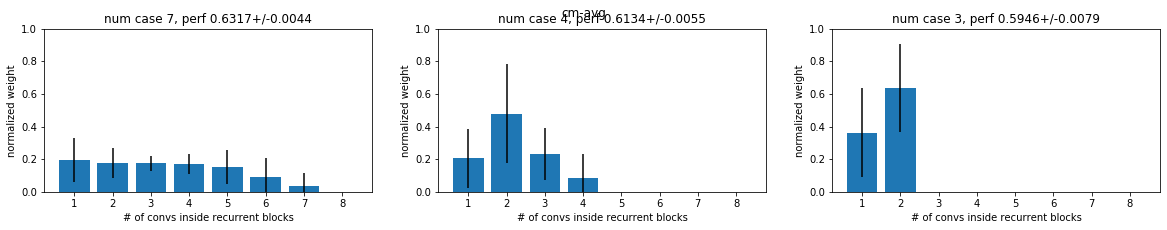

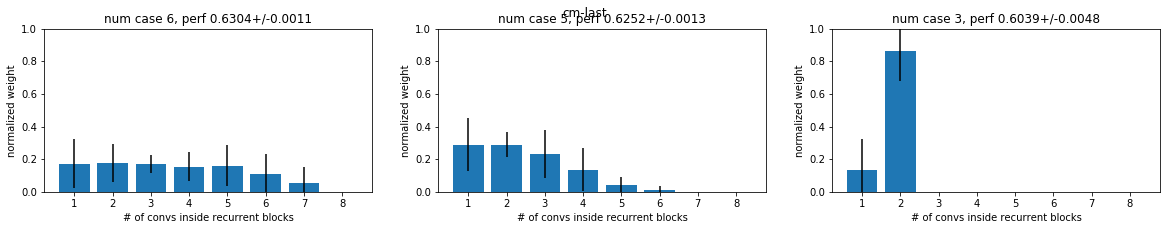

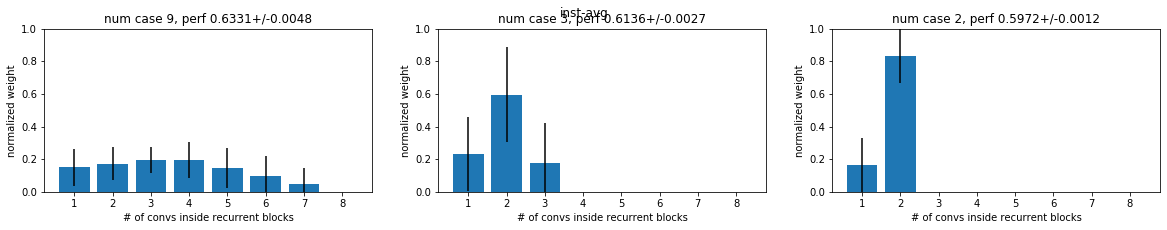

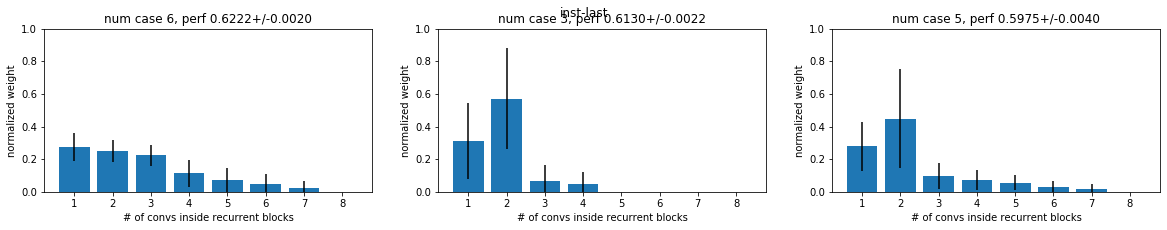

In [89]:
plot_cluster_wrapper(
    clustering_result_dict_global,
    train_size=2560,
    num_c=64,
    num_l=3,
)

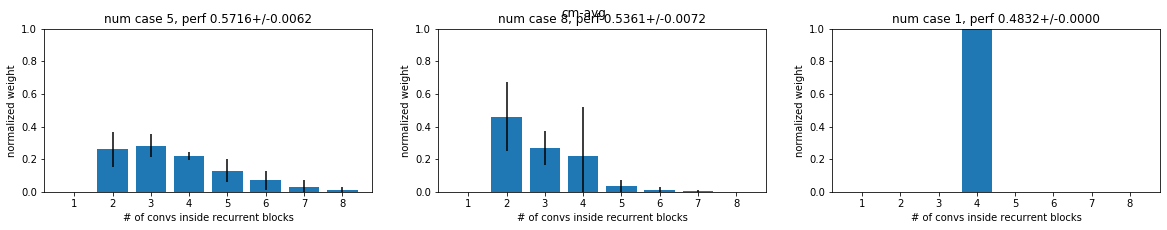

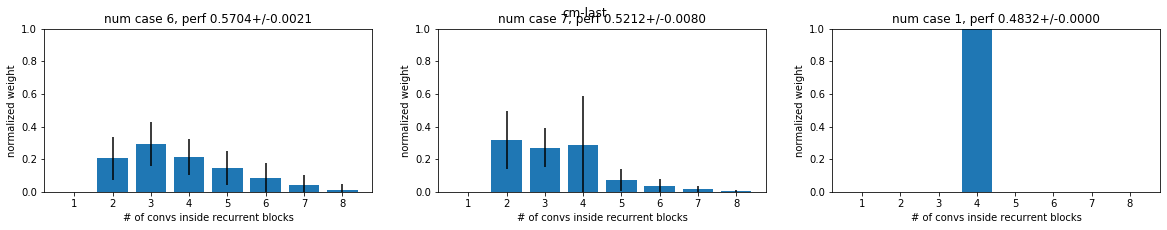

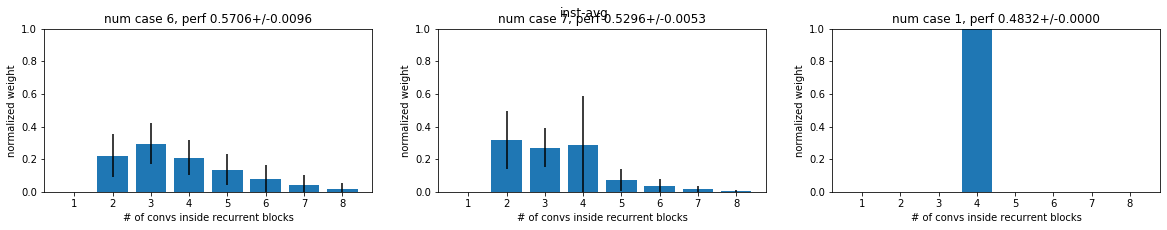

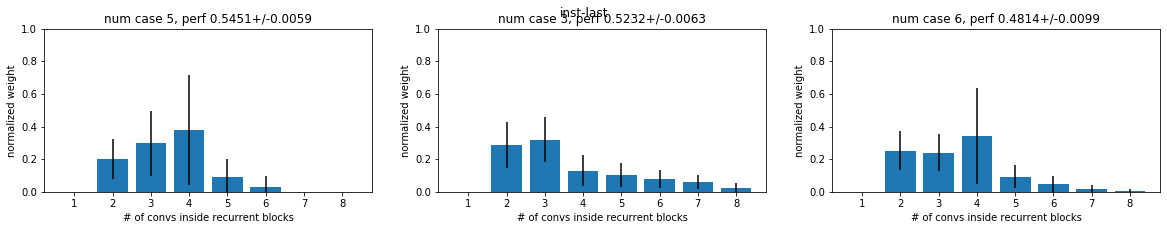

In [90]:
plot_cluster_wrapper(
    clustering_result_dict_global,
    train_size=1280,
    num_c=64,
    num_l=5,
)

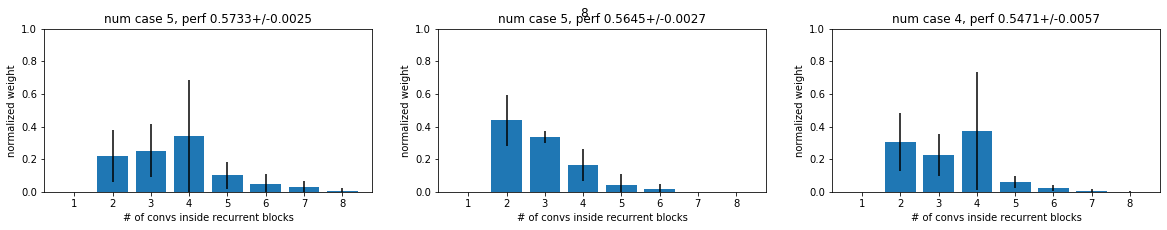

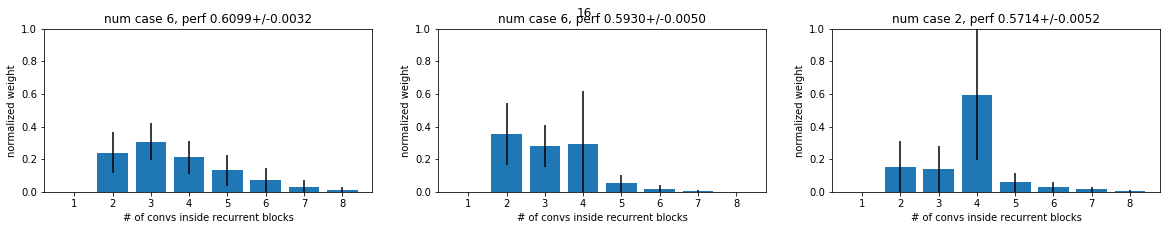

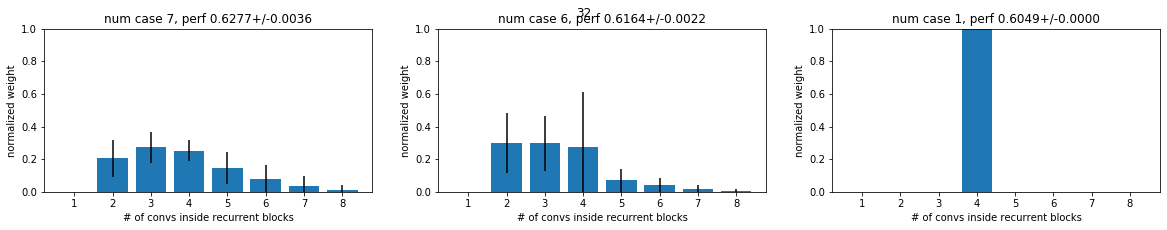

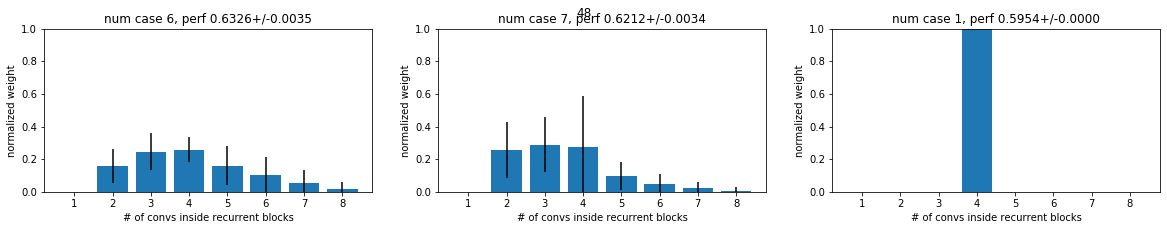

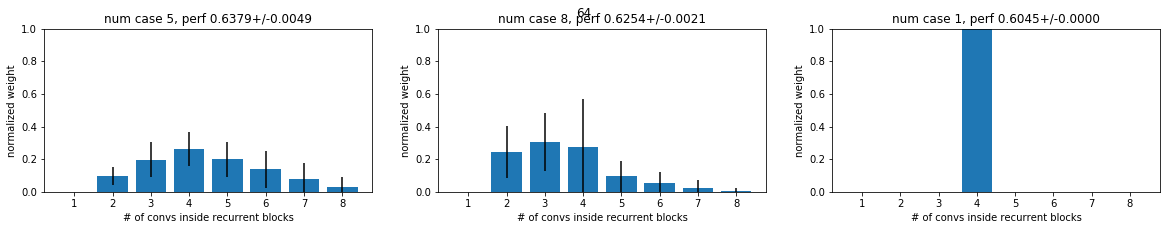

In [91]:
plot_cluster_wrapper(
    clustering_result_dict_global,
    train_size=2560,
    num_c=None,
    num_l=5,
     readout_type='cm-last',
)

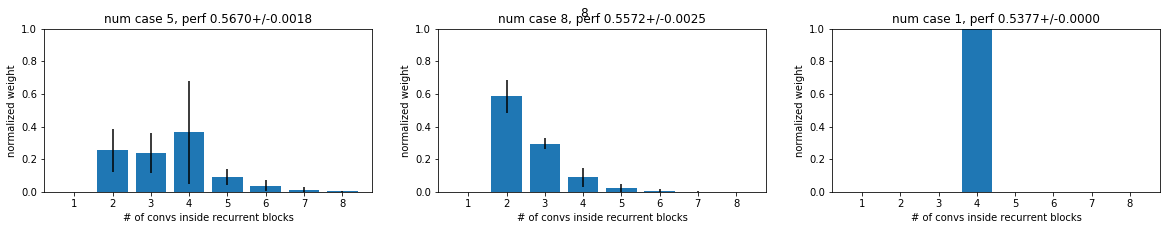

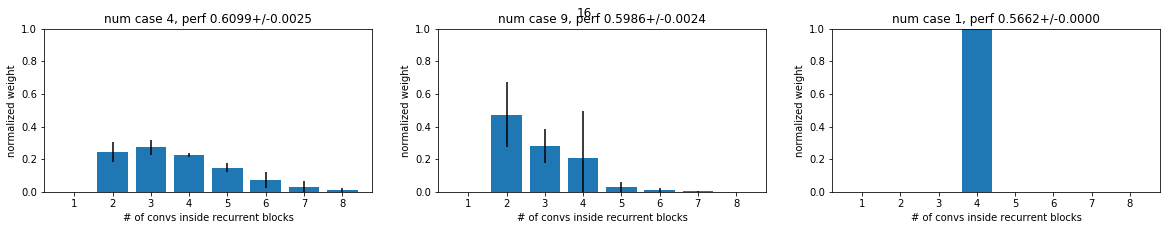

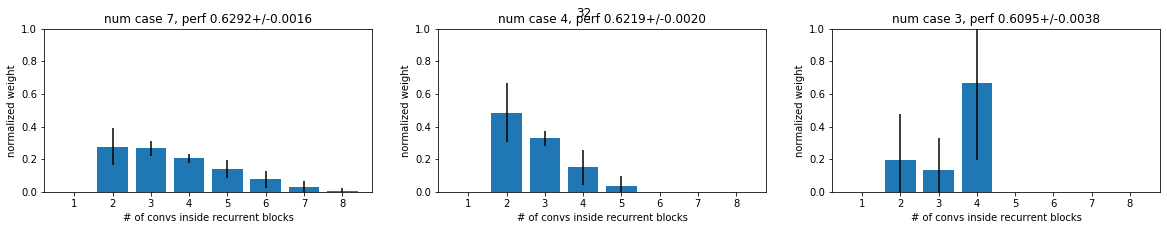

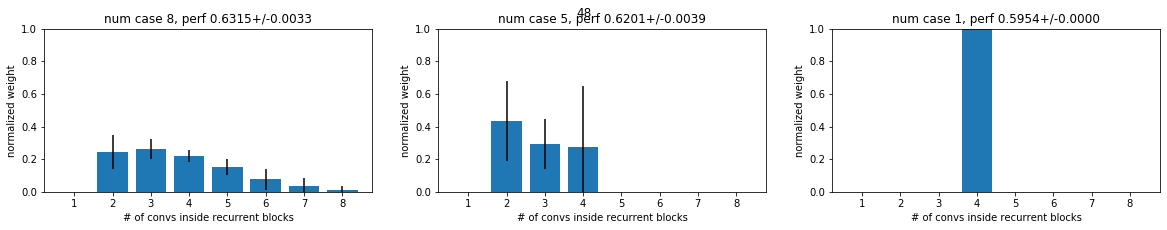

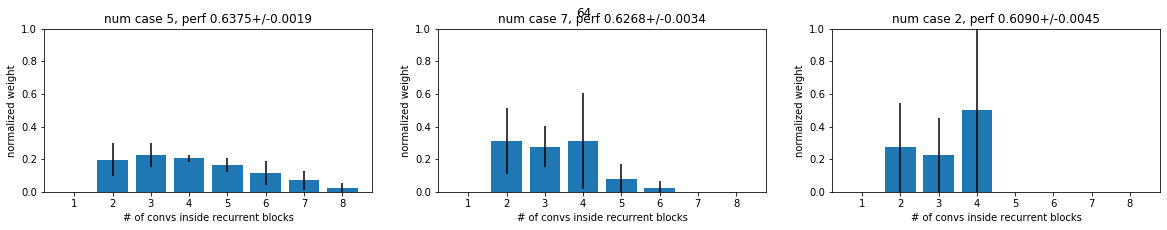

In [92]:
plot_cluster_wrapper(
    clustering_result_dict_global,
    train_size=2560,
    num_c=None,
    num_l=5,
     readout_type='cm-avg',
)

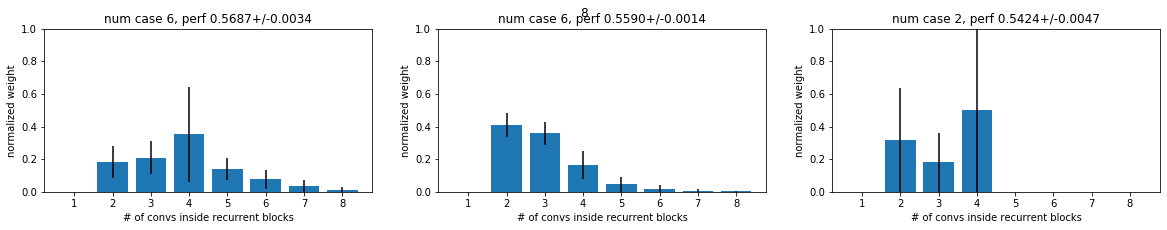

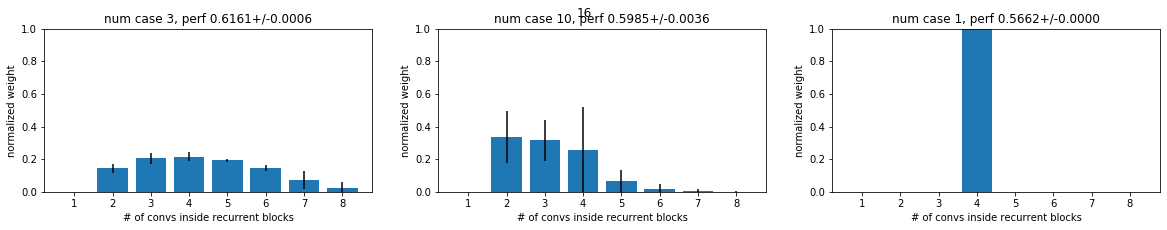

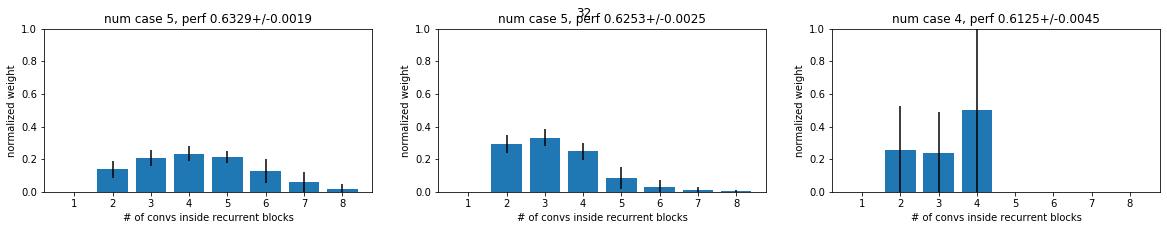

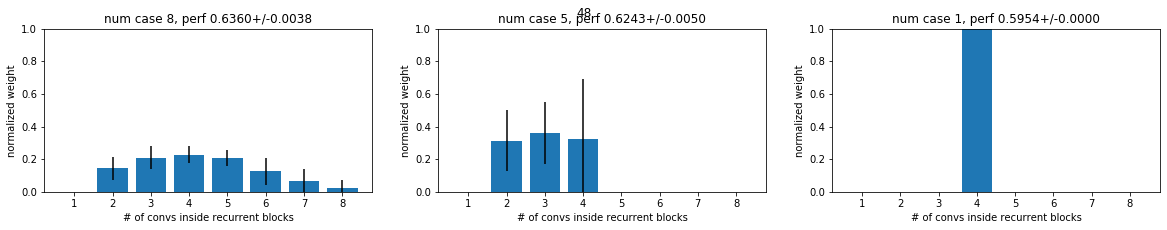

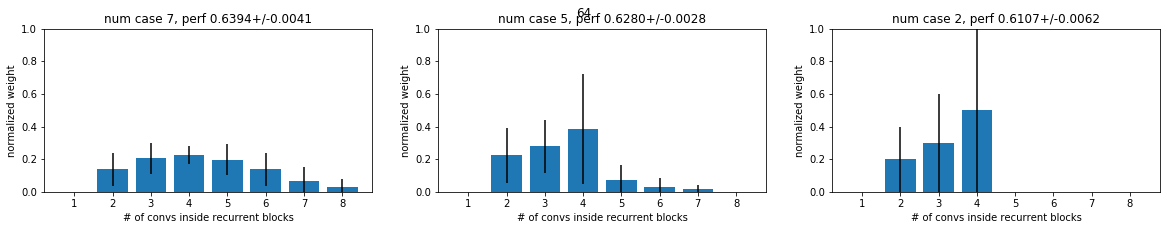

In [93]:
plot_cluster_wrapper(
    clustering_result_dict_global,
    train_size=2560,
    num_c=None,
    num_l=5,
     readout_type='inst-avg',
)

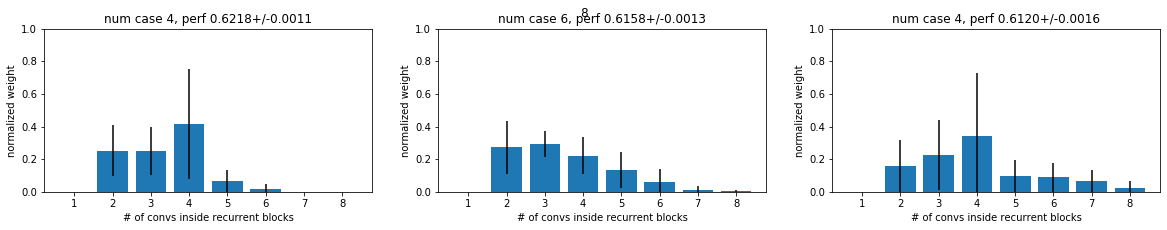

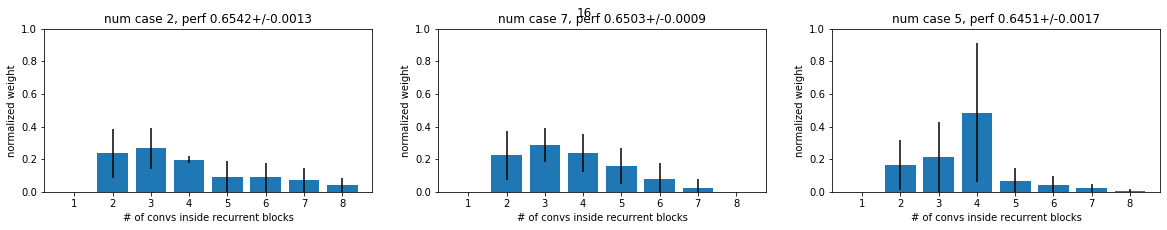

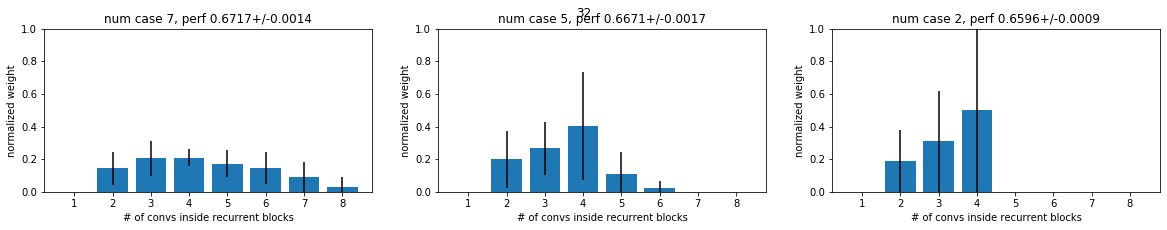

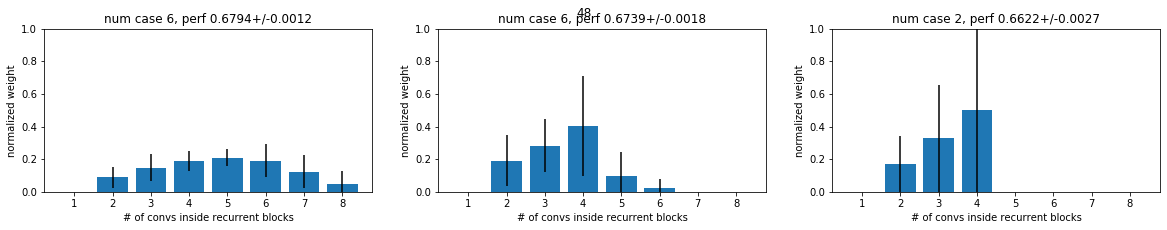

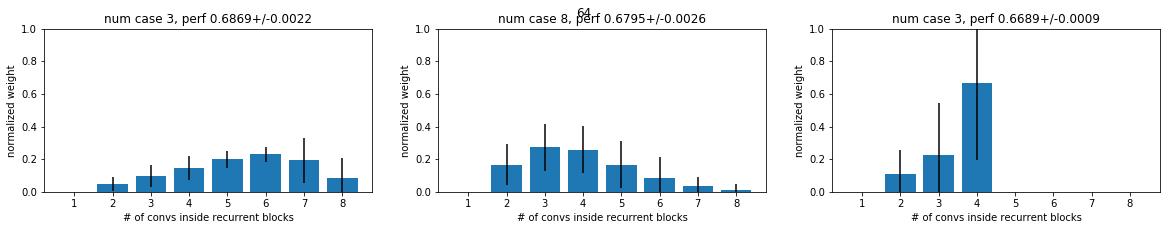

In [94]:
plot_cluster_wrapper(
    clustering_result_dict_global,
    train_size=5120,
    num_c=None,
    num_l=5,
     readout_type='cm-last',
)

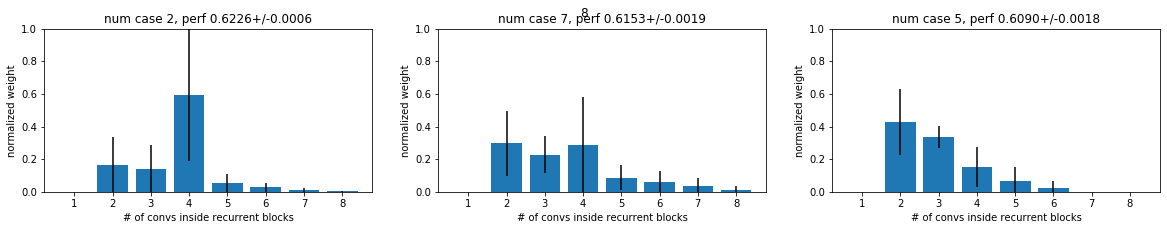

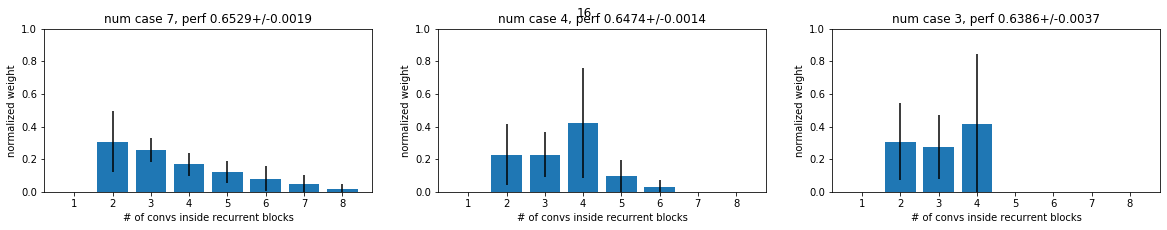

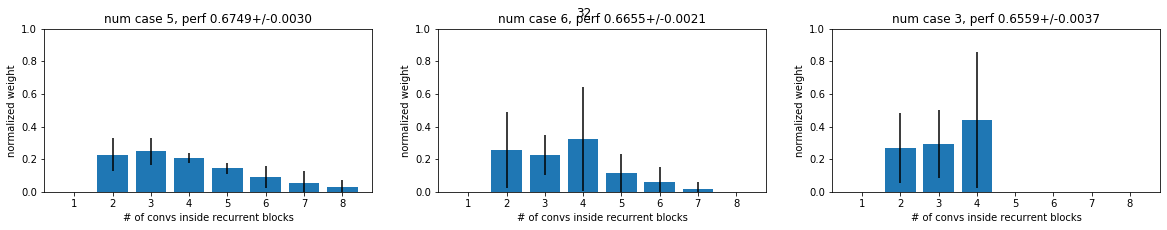

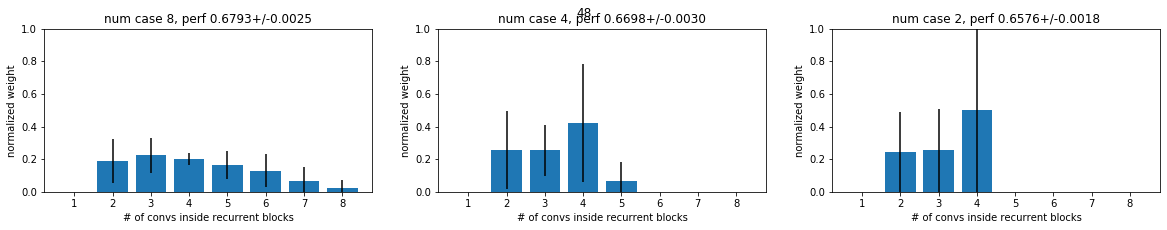

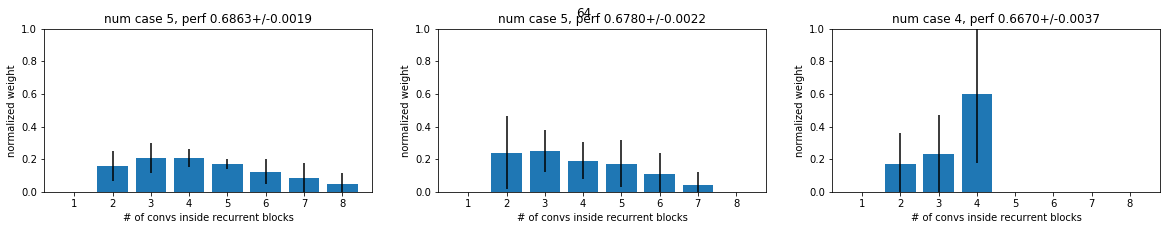

In [95]:
plot_cluster_wrapper(
    clustering_result_dict_global,
    train_size=5120,
    num_c=None,
    num_l=5,
     readout_type='cm-avg',
)

In [ ]:
plot_cluster_wrapper(
    clustering_result_dict_global,
    train_size=5120,
    num_c=None,
    num_l=5,
     readout_type='cm-last',
)